In [1]:
import re
from pprint import pprint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import TreebankWordTokenizer

from rdflib import Graph, Literal, URIRef, Namespace, BNode, Literal, Bag
from rdflib.namespace import RDF, RDFS, SH, FOAF, XSD
from rdflib.container import Container
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
import networkx as nx
import seaborn as sns
from pyshacl import validate

In [2]:
df_indiv = pd.read_csv("../ressources/Table_indiv.csv", sep=";", encoding="windows-1252")
# df_indiv = df_indiv.loc[df_indiv["tage"] > 3]
# age > 3 => people whose age is 18 and more

C:\Users\nigit\AppData\Local\Temp\ipykernel_18024\2278581374.py:1: DtypeWarning: Columns (150,151,152,153,154,155) have mixed types. Specify dtype option on import or set low_memory=False.
  df_indiv = pd.read_csv("../ressources/Table_indiv.csv", sep=";", encoding="windows-1252")


In [3]:
df_child=df_indiv.loc[ df_indiv["tage"] <= 3]

In [4]:
df_child.shape

(1455, 330)

In [5]:
df_child.head()

sexeps  fqcantine  entrerep  colmata  distrib  distconf  distfruit  \
2615     NaN        5.0       2.0      NaN      5.0       NaN        NaN   
2616     NaN        2.0       3.0      NaN      5.0       NaN        NaN   
2617     NaN        5.0       2.0      3.0      5.0       NaN        NaN   
2618     NaN        5.0       9.0      NaN      4.0       2.0        2.0   
2619     NaN        1.0       4.0      5.0      5.0       NaN        NaN   

      distsoli  fastfood  ffrepas  ...  peaupoulet  grasjambon  peaupommes  \
2615       NaN       6.0      1.0  ...           2           2           1   
2616       NaN       6.0      1.0  ...           1           2           1   
2617       NaN       5.0      1.0  ...           1           2           1   
2618       1.0       7.0      NaN  ...           2           2           2   
2619       NaN       7.0      NaN  ...           2           2           2   

      typelait  suc_yao  suc_froblanc  suc_suisse  suc_cafe  suc_the  \
2615         2        1             5           1         1        1   
2616         2        5             5           4         1        5   
2617         2        4             4           4         1        5   
2618         2        1             1           1         1        5   
2619         2        5             5           5         1        1   

      suc_boischoc  
2615             4  
2616             5  
2617             4  
2618             1  
2619             5  

[5 rows x 330 columns]

In [6]:
df_child.describe()

sexeps    fqcantine     entrerep     colmata      distrib    distconf  \
count     0.0  1452.000000  1452.000000  375.000000  1452.000000  377.000000   
mean      NaN     2.967631     3.049587    3.976000     4.700413    1.615385   
std       NaN     1.602350     1.478173    1.465087     0.835415    0.487151   
min       NaN     1.000000     1.000000    1.000000     1.000000    1.000000   
25%       NaN     2.000000     2.000000    3.000000     4.000000    1.000000   
50%       NaN     2.000000     3.000000    5.000000     5.000000    2.000000   
75%       NaN     5.000000     3.000000    5.000000     5.000000    2.000000   
max       NaN     9.000000     9.000000    9.000000     9.000000    2.000000   

        distfruit    distsoli     fastfood      ffrepas  ...   peaupoulet  \
count  377.000000  377.000000  1452.000000  1124.000000  ...  1455.000000   
mean     1.888594    1.880637     5.846419     1.225979  ...     1.617182   
std      0.315052    0.324646     1.016999     0.826219  ...     0.490467   
min      1.000000    1.000000     1.000000     1.000000  ...     1.000000   
25%      2.000000    2.000000     5.000000     1.000000  ...     1.000000   
50%      2.000000    2.000000     6.000000     1.000000  ...     2.000000   
75%      2.000000    2.000000     6.000000     1.000000  ...     2.000000   
max      2.000000    2.000000     9.000000     9.000000  ...     3.000000   

        grasjambon   peaupommes     typelait      suc_yao  suc_froblanc  \
count  1455.000000  1455.000000  1455.000000  1455.000000   1455.000000   
mean      1.868729     1.378694     2.324399     2.112715      2.511340   
std       0.343867     0.493660     1.183008     1.680766      1.852832   
min       1.000000     1.000000     1.000000     1.000000      1.000000   
25%       2.000000     1.000000     2.000000     1.000000      1.000000   
50%       2.000000     1.000000     2.000000     1.000000      1.000000   
75%       2.000000     2.000000     2.000000     4.000000      5.000000   
max       3.000000     3.000000     7.000000     7.000000      9.000000   

        suc_suisse     suc_cafe      suc_the  suc_boischoc  
count  1455.000000  1455.000000  1455.000000   1455.000000  
mean      2.593814     4.358763     4.050859      3.695533  
std       1.860127     1.416819     1.627700      1.329519  
min       1.000000     1.000000     1.000000      1.000000  
25%       1.000000     5.000000     4.000000      4.000000  
50%       1.000000     5.000000     5.000000      4.000000  
75%       5.000000     5.000000     5.000000      4.000000  
max       7.000000     5.000000     6.000000      6.000000  

[8 rows x 319 columns]

In [7]:
df_indiv = df_indiv.loc[df_indiv["tage"] > 3]

In [8]:
df_indiv.shape

(2624, 330)

In [9]:
df_indiv.describe()

sexeps    fqcantine     entrerep      colmata      distrib  \
count  2615.000000  2615.000000  2615.000000  1863.000000  2615.000000   
mean      1.585851     8.805354     4.074187     3.939882     4.736138   
std       0.492669     1.074132     1.670850     1.484844     0.832106   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       1.000000     9.000000     3.000000     3.000000     5.000000   
50%       2.000000     9.000000     4.000000     4.000000     5.000000   
75%       2.000000     9.000000     6.000000     5.000000     5.000000   
max       2.000000     9.000000     9.000000     9.000000     9.000000   

         distconf   distfruit    distsoli     fastfood      ffrepas  ...  \
count  553.000000  553.000000  553.000000  2615.000000  1268.000000  ...   
mean     1.851718    1.858951    1.904159     6.279159     1.289432  ...   
std      0.355701    0.348387    0.294639     1.029075     1.078153  ...   
min      1.000000    1.000000    1.000000     1.000000     1.000000  ...   
25%      2.000000    2.000000    2.000000     6.000000     1.000000  ...   
50%      2.000000    2.000000    2.000000     7.000000     1.000000  ...   
75%      2.000000    2.000000    2.000000     7.000000     1.000000  ...   
max      2.000000    2.000000    2.000000     9.000000     9.000000  ...   

        peaupoulet   grasjambon   peaupommes     typelait      suc_yao  \
count  2624.000000  2624.000000  2624.000000  2624.000000  2624.000000   
mean      1.604802     1.740854     1.440549     2.932165     2.816692   
std       0.495184     0.445155     0.504167     1.695223     1.668349   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       1.000000     1.000000     1.000000     2.000000     1.000000   
50%       2.000000     2.000000     1.000000     2.000000     3.000000   
75%       2.000000     2.000000     2.000000     3.000000     4.000000   
max       3.000000     3.000000     3.000000     7.000000     8.000000   

       suc_froblanc   suc_suisse     suc_cafe      suc_the  suc_boischoc  
count   2624.000000  2624.000000  2624.000000  2624.000000   2624.000000  
mean       2.944741     3.513720     2.799924     3.476753      4.191311  
std        1.786443     1.794802     1.655633     1.624087      1.238898  
min        1.000000     1.000000     1.000000     1.000000      1.000000  
25%        1.000000     1.000000     1.000000     1.000000      4.000000  
50%        4.000000     5.000000     3.000000     4.000000      5.000000  
75%        5.000000     5.000000     4.000000     5.000000      5.000000  
max        9.000000     9.000000     8.000000     6.000000      6.000000  

[8 rows x 319 columns]

In [10]:
df_indiv.head()

sexeps  fqcantine  entrerep  colmata  distrib  distconf  distfruit  \
0     2.0        9.0       4.0      4.0      5.0       NaN        NaN   
1     1.0        9.0       4.0      5.0      4.0       2.0        2.0   
2     2.0        9.0       5.0      4.0      5.0       NaN        NaN   
3     2.0        9.0       2.0      3.0      5.0       NaN        NaN   
4     2.0        9.0       2.0      1.0      5.0       NaN        NaN   

   distsoli  fastfood  ffrepas  ...  peaupoulet  grasjambon  peaupommes  \
0       NaN       6.0      1.0  ...           1           1           1   
1       2.0       6.0      1.0  ...           2           2           2   
2       NaN       7.0      NaN  ...           2           2           2   
3       NaN       7.0      NaN  ...           2           2           2   
4       NaN       1.0      1.0  ...           2           2           1   

   typelait  suc_yao  suc_froblanc  suc_suisse  suc_cafe  suc_the  \
0         3        4             1           1         5        4   
1         2        4             4           5         1        1   
2         6        3             3           5         3        3   
3         6        1             1           1         1        5   
4         2        5             5           5         1        1   

   suc_boischoc  
0             5  
1             5  
2             5  
3             5  
4             5  

[5 rows x 330 columns]

In [11]:
df_indiv["tage"].value_counts()

tage
6    837
7    750
5    432
8    348
4    257
Name: count, dtype: int64

In [12]:
df_child["tage"].value_counts()

tage
1    574
2    456
3    425
Name: count, dtype: int64

In [13]:
df_indiv['mleg']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
4071   NaN
4072   NaN
4073   NaN
4074   NaN
4075   NaN
Name: mleg, Length: 2624, dtype: float64

In [14]:
df= df_indiv.isnull().sum().sort_values(ascending=False)
df_describe= pd.DataFrame( data=df, index=df.index)
df_describe

0
alimpub3_cod  2624
mpois         2624
achpub3       2624
q181          2624
achpub4       2624
...            ...
dip              0
cspi             0
reg              0
tage             0
suc_boischoc     0

[330 rows x 1 columns]

In [15]:
df_indiv.columns.to_numpy()

array(['sexeps', 'fqcantine', 'entrerep', 'colmata', 'distrib',
       'distconf', 'distfruit', 'distsoli', 'fastfood', 'ffrepas',
       'selassent', 'selassleg', 'selassfec', 'selassvp', 'selassvps',
       'selassoeuf', 'enrich', 'lardcru', 'sauccru', 'boeufcru',
       'chevcru', 'porccru', 'volcru', 'poiscru', 'oeufcru',
       'shboeufcuis', 'boeufcuis', 'rotboeufcuis', 'foiecuis', 'veaucuis',
       'porccuis', 'sauccuis', 'chevcuis', 'agncuis', 'cotagncuis',
       'volcuis', 'intalim', 'intalinouv', 'infopub', 'infoprof',
       'infointern', 'etiquetad', 'etiqingr', 'etiqnut', 'etiqport',
       'etiqclnut', 'etiqclsant', 'bonalim', 'regimedj', 'poids12',
       'poids12nsp', 'essaipds', 'contalim', 'contap', 'opipoids',
       'voeupoids', 'nbgeneral', 'nbspecial', 'pdsmax', 'agepmax',
       'agepmaxnsp', 'pdsmin', 'pdsminnsp', 'agepmin', 'agepminnsp',
       'cyclepds', 'enceinte', 'allaite', 'enceinte12', 'menopaus', 'ths',
       'fume', 'nbcigrjm', 'nbpipejm', 'nbcigrsm

In [16]:
df_indiv["sexe_ps"].value_counts()
# sexe_ps => 1: male, 2:female

sexe_ps
2    1537
1    1087
Name: count, dtype: int64

In [17]:
def define_attr(attr_name, df= df_indiv, plot=False):
    print("*****************",attr_name,"*****************")
    print("value counts for the attribute are ",df[attr_name].value_counts())
    print("------------------------------------------------------")
    print("Total null values ", df[attr_name].isnull().sum())
    print("------------------------------------------------------")
    print("null values for females ", df.query("sexe_ps == 2")[attr_name].isnull().sum())
    print("-------------------------------------------------------")
    print("null values for males ", df.query("sexe_ps == 1")[attr_name].isnull().sum())
    print("-------------------------------------------------------")
    print("summary of attribute ", df[attr_name].describe())
    if plot:
        # plt.bar(x='sexe_ps', height=attr_name, data=df)
        # plt.title('Average ' +attr_name + " by Sex")
        # plt.show()
        plt.figure(figsize=(8, 6))
        df.groupby(['sexe_ps', attr_name]).size().unstack().plot(kind='bar', stacked=True)

        # Customize the plot
        plt.title('Gender Distribution Based on '+attr_name)
        plt.xlabel('Gender')
        plt.ylabel('Count')
        plt.legend(title=attr_name)
        plt.show()
    


In [18]:
def plot_by_age(attr_name, df= df_indiv):
    print("*****************",attr_name,"*****************")
    
    plt.figure(figsize=(8, 6))
    df.groupby(['tage', attr_name]).size().unstack().plot(kind='bar', stacked=True)

    # Customize the plot
    plt.title('Age Distribution Based on '+attr_name)
    plt.xlabel('Age range')
    plt.ylabel('Count')
    plt.legend(title=attr_name)
    plt.show()

### AIME fields
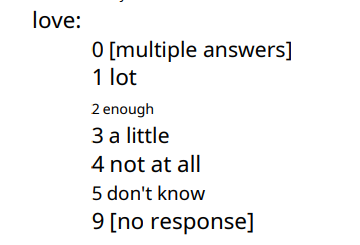

### onsp fields
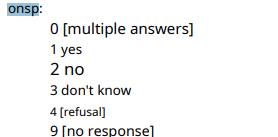

### autregme fields
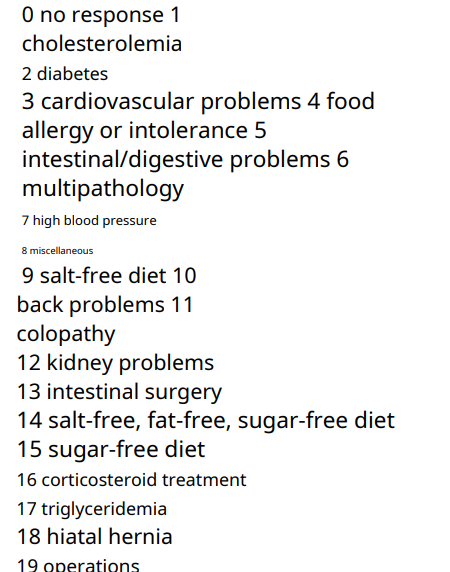

### otherg fields
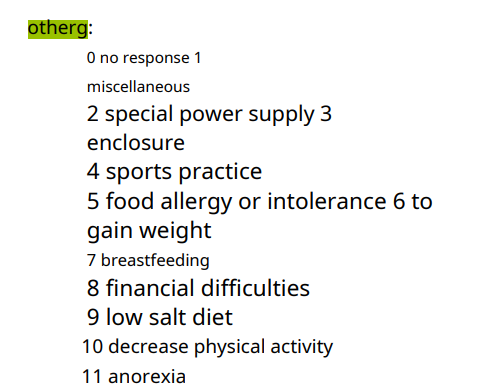

## For childern

In [19]:
df_child['sexe_ps'].value_counts()

sexe_ps
2    767
1    688
Name: count, dtype: int64

***************** myao *****************
value counts for the attribute are  myao
1.0    445
2.0    313
3.0     89
4.0     18
9.0     13
5.0      1
Name: count, dtype: int64
------------------------------------------------------
Total null values  576
------------------------------------------------------
null values for females  296
-------------------------------------------------------
null values for males  280
-------------------------------------------------------
summary of attribute  count    879.000000
mean       1.742890
std        1.166099
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        9.000000
Name: myao, dtype: float64


<Figure size 800x600 with 0 Axes>

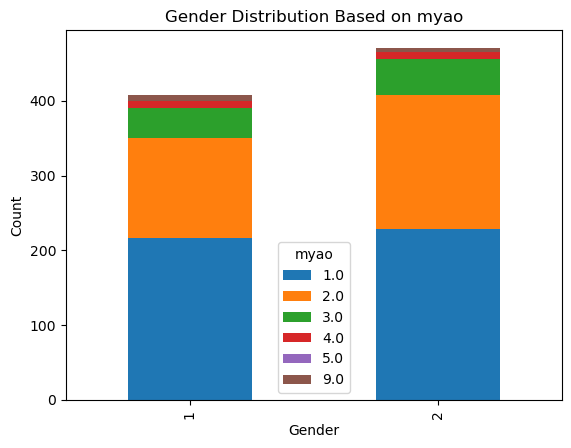

In [20]:
# aime
define_attr("myao",df=df_child, plot=True)

***************** myao *****************


<Figure size 800x600 with 0 Axes>

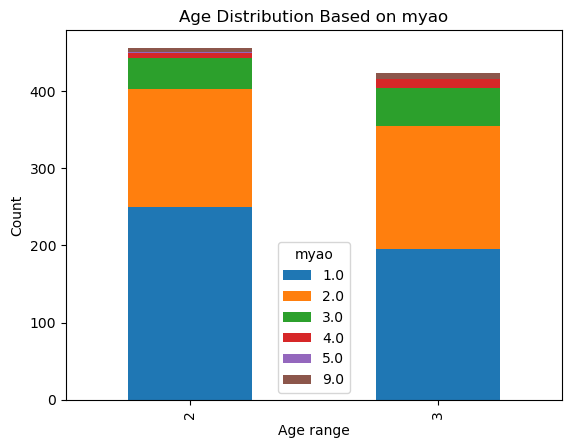

In [21]:
plot_by_age('myao', df=df_child)

***************** mlait *****************
value counts for the attribute are  mlait
1.0    374
2.0    233
3.0    159
4.0     99
9.0     13
5.0      1
Name: count, dtype: int64
------------------------------------------------------
Total null values  576
------------------------------------------------------
null values for females  296
-------------------------------------------------------
null values for males  280
-------------------------------------------------------
summary of attribute  count    879.000000
mean       2.087600
std        1.336476
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: mlait, dtype: float64


<Figure size 800x600 with 0 Axes>

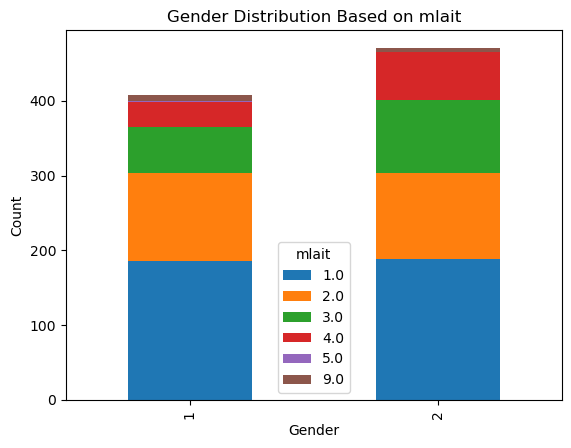

In [22]:
define_attr("mlait",df=df_child, plot=True)

***************** mfrom *****************
value counts for the attribute are  mfrom
1.0    313
2.0    283
3.0    206
4.0     62
9.0     15
Name: count, dtype: int64
------------------------------------------------------
Total null values  576
------------------------------------------------------
null values for females  296
-------------------------------------------------------
null values for males  280
-------------------------------------------------------
summary of attribute  count    879.000000
mean       2.138794
std        1.300546
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: mfrom, dtype: float64


<Figure size 800x600 with 0 Axes>

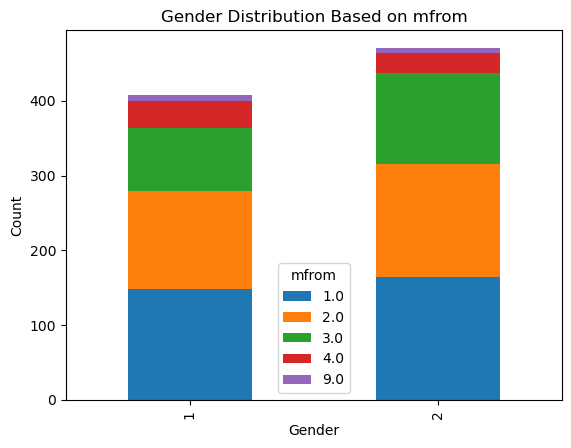

In [23]:
define_attr("mfrom",df=df_child, plot=True)

***************** mvian *****************
value counts for the attribute are  mvian
1.0    433
2.0    288
3.0    123
4.0     22
9.0     13
Name: count, dtype: int64
------------------------------------------------------
Total null values  576
------------------------------------------------------
null values for females  296
-------------------------------------------------------
null values for males  280
-------------------------------------------------------
summary of attribute  count    879.00000
mean       1.80091
std        1.19135
min        1.00000
25%        1.00000
50%        2.00000
75%        2.00000
max        9.00000
Name: mvian, dtype: float64


<Figure size 800x600 with 0 Axes>

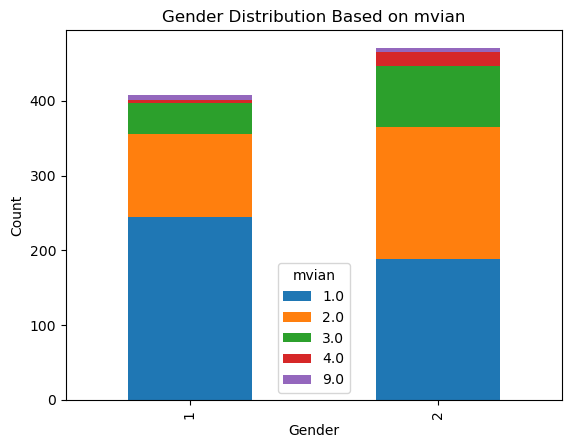

In [24]:
define_attr("mvian",df=df_child, plot=True)

***************** mfrom *****************


<Figure size 800x600 with 0 Axes>

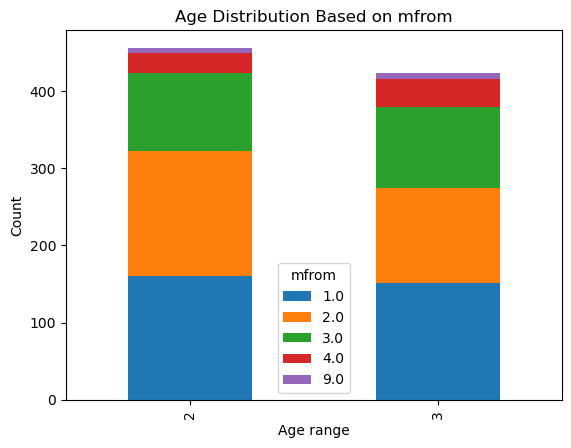

In [25]:
plot_by_age('mfrom',df=df_child)

***************** msoda *****************
value counts for the attribute are  msoda
1.0    357
2.0    267
3.0    175
4.0     67
9.0     12
5.0      1
Name: count, dtype: int64
------------------------------------------------------
Total null values  576
------------------------------------------------------
null values for females  296
-------------------------------------------------------
null values for males  280
-------------------------------------------------------
summary of attribute  count    879.000000
mean       2.044369
std        1.260613
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: msoda, dtype: float64


<Figure size 800x600 with 0 Axes>

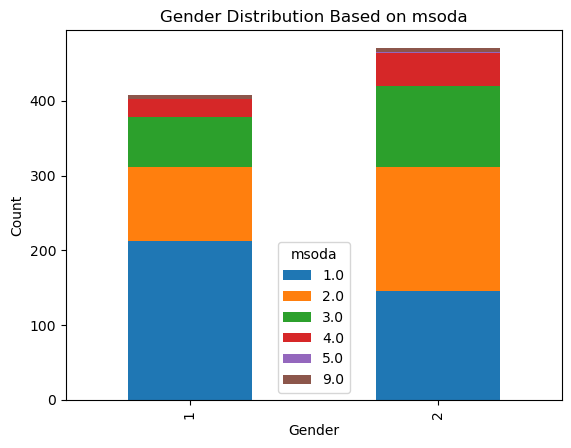

In [26]:
define_attr("msoda",df=df_child, plot=True)

***************** mpois *****************
value counts for the attribute are  mpois
3.0    282
2.0    278
1.0    183
4.0    124
9.0     12
Name: count, dtype: int64
------------------------------------------------------
Total null values  576
------------------------------------------------------
null values for females  296
-------------------------------------------------------
null values for males  280
-------------------------------------------------------
summary of attribute  count    879.000000
mean       2.490330
std        1.234317
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: mpois, dtype: float64


<Figure size 800x600 with 0 Axes>

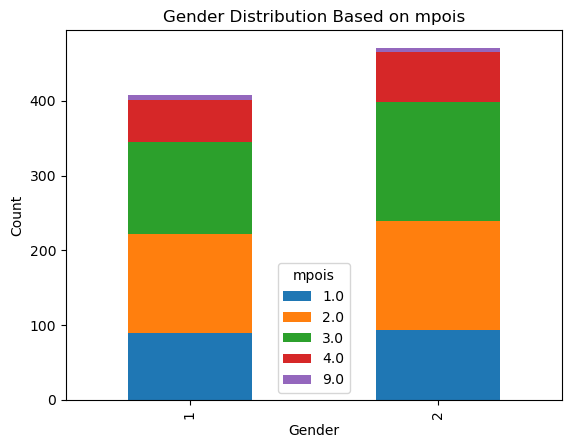

In [27]:
define_attr("mpois",df=df_child, plot=True)

***************** mleg *****************
value counts for the attribute are  mleg
2.0    378
3.0    254
1.0    205
4.0     29
9.0     13
Name: count, dtype: int64
------------------------------------------------------
Total null values  576
------------------------------------------------------
null values for females  296
-------------------------------------------------------
null values for males  280
-------------------------------------------------------
summary of attribute  count    879.000000
mean       2.225256
std        1.153088
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: mleg, dtype: float64


<Figure size 800x600 with 0 Axes>

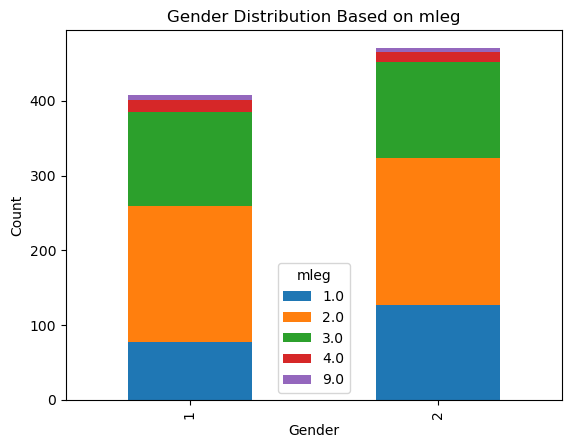

In [28]:
define_attr("mleg",df=df_child, plot=True)

***************** mjus *****************
value counts for the attribute are  mjus
1.0    533
2.0    245
3.0     75
4.0     13
9.0     13
Name: count, dtype: int64
------------------------------------------------------
Total null values  576
------------------------------------------------------
null values for females  296
-------------------------------------------------------
null values for males  280
-------------------------------------------------------
summary of attribute  count    879.000000
mean       1.612059
std        1.151760
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        9.000000
Name: mjus, dtype: float64


<Figure size 800x600 with 0 Axes>

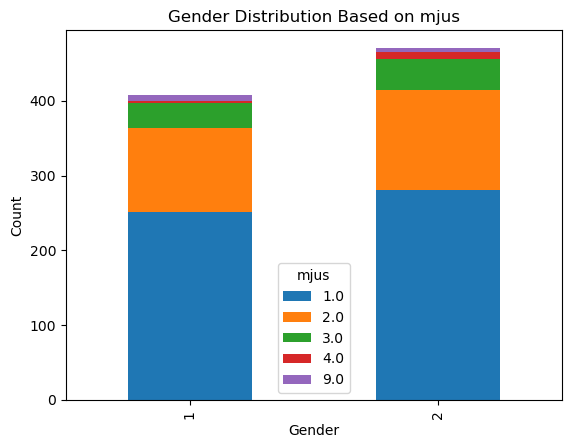

In [29]:
define_attr("mjus",df=df_child, plot=True)

***************** mglace *****************
value counts for the attribute are  mglace
1.0    534
2.0    210
3.0    110
9.0     13
4.0     12
Name: count, dtype: int64
------------------------------------------------------
Total null values  576
------------------------------------------------------
null values for females  296
-------------------------------------------------------
null values for males  280
-------------------------------------------------------
summary of attribute  count    879.000000
mean       1.648464
std        1.178961
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        9.000000
Name: mglace, dtype: float64


<Figure size 800x600 with 0 Axes>

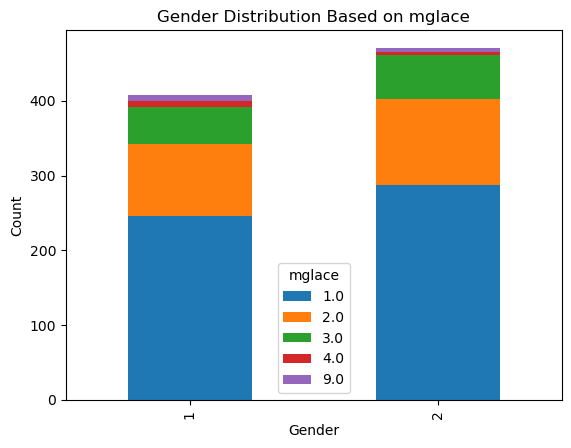

In [30]:
define_attr("mglace",df=df_child, plot=True)

***************** mfruit *****************
value counts for the attribute are  mfruit
1.0    458
2.0    257
3.0    137
9.0     14
4.0     13
Name: count, dtype: int64
------------------------------------------------------
Total null values  576
------------------------------------------------------
null values for females  296
-------------------------------------------------------
null values for males  280
-------------------------------------------------------
summary of attribute  count    879.000000
mean       1.775882
std        1.211585
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        9.000000
Name: mfruit, dtype: float64


<Figure size 800x600 with 0 Axes>

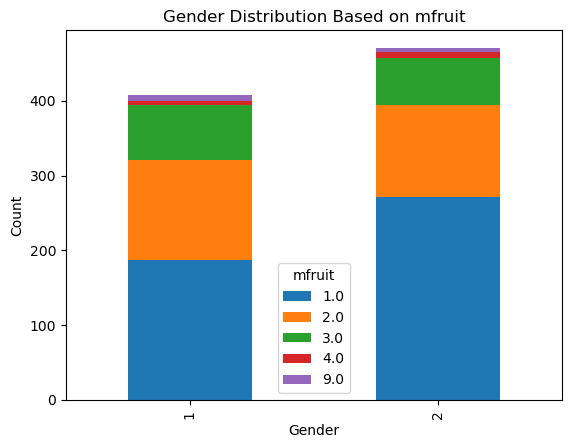

In [31]:
define_attr("mfruit",df=df_child, plot=True)

### Smooking Fields

***************** agefumem *****************
value counts for the attribute are  agefumem
14.0    14
15.0    13
16.0     8
13.0     7
11.0     3
99.0     3
12.0     1
Name: count, dtype: int64
------------------------------------------------------
Total null values  1406
------------------------------------------------------
null values for females  739
-------------------------------------------------------
null values for males  667
-------------------------------------------------------
summary of attribute  count    49.000000
mean     19.428571
std      20.572028
min      11.000000
25%      14.000000
50%      14.000000
75%      15.000000
max      99.000000
Name: agefumem, dtype: float64


<Figure size 800x600 with 0 Axes>

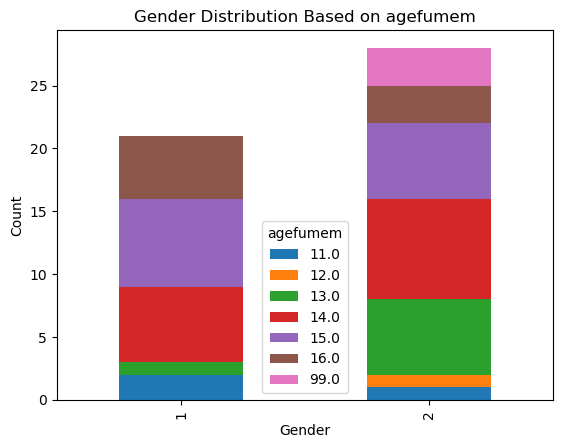

In [32]:
# age when start smooking regularly
define_attr(attr_name="agefumem", df=df_child, plot=True)

***************** agefumem *****************


<Figure size 800x600 with 0 Axes>

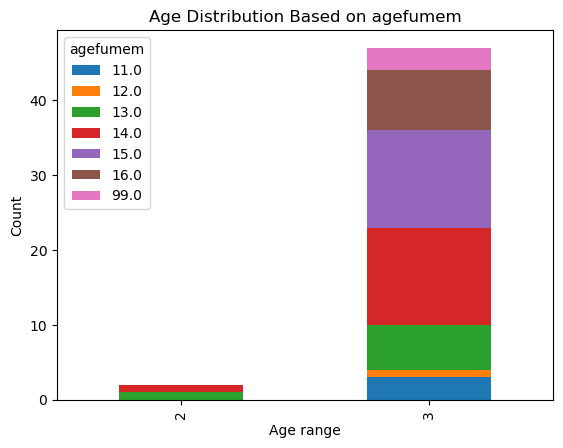

In [33]:
plot_by_age('agefumem', df=df_child)

In [34]:
define_attr(attr_name="agefumem", df=df_indiv)

***************** agefumem *****************
value counts for the attribute are  agefumem
18.0    141
16.0    103
20.0     96
17.0     89
15.0     82
14.0     47
99.0     36
25.0     31
98.0     24
19.0     23
13.0     22
23.0     13
22.0     12
21.0     12
30.0     12
24.0     11
12.0      9
40.0      6
26.0      4
11.0      4
27.0      4
28.0      4
45.0      3
50.0      3
33.0      3
35.0      2
31.0      2
44.0      2
47.0      1
29.0      1
48.0      1
42.0      1
10.0      1
60.0      1
34.0      1
37.0      1
Name: count, dtype: int64
------------------------------------------------------
Total null values  1816
------------------------------------------------------
null values for females  1093
-------------------------------------------------------
null values for males  723
-------------------------------------------------------
summary of attribute  count    808.000000
mean      24.736386
std       21.637857
min       10.000000
25%       16.000000
50%       18.000000
75%    

***************** agefumemnsp *****************
value counts for the attribute are  agefumemnsp
1.0    24
Name: count, dtype: int64
------------------------------------------------------
Total null values  2600
------------------------------------------------------
null values for females  1527
-------------------------------------------------------
null values for males  1073
-------------------------------------------------------
summary of attribute  count    24.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: agefumemnsp, dtype: float64


<Figure size 800x600 with 0 Axes>

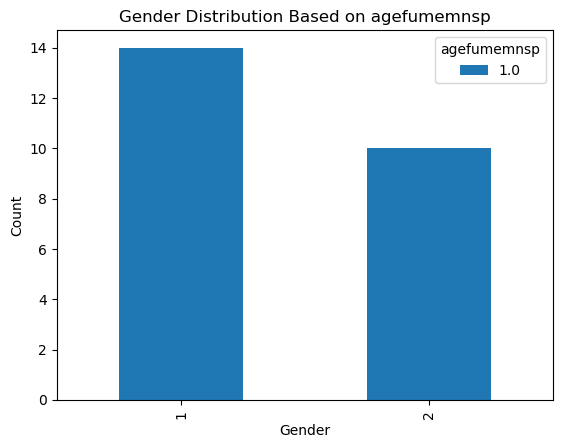

In [35]:
# TODO: NSP à quel âge a commencé à fumer régulièrement (fumeur actuel)
define_attr(attr_name="agefumemnsp", plot= True)

***************** agestopnsp *****************
value counts for the attribute are  agestopnsp
1.0    28
Name: count, dtype: int64
------------------------------------------------------
Total null values  2596
------------------------------------------------------
null values for females  1523
-------------------------------------------------------
null values for males  1073
-------------------------------------------------------
summary of attribute  count    28.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: agestopnsp, dtype: float64


<Figure size 800x600 with 0 Axes>

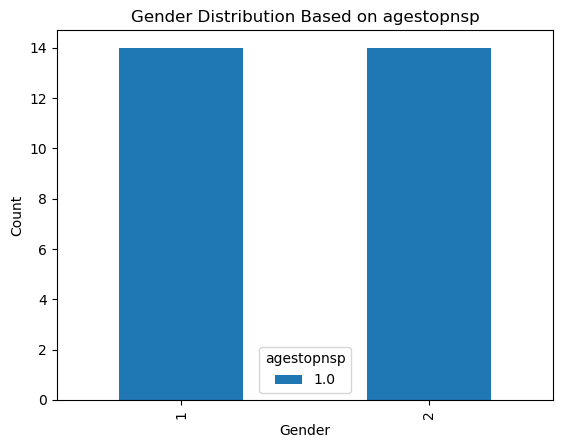

In [36]:
#TODO: A quel âge a arrêté de fumer définitivement (ancien fumeur)
define_attr(attr_name="agestopnsp", plot=True)

***************** allaite *****************
value counts for the attribute are  allaite
2.0    1257
9.0     248
1.0      21
3.0       6
Name: count, dtype: int64
------------------------------------------------------
Total null values  1092
------------------------------------------------------


null values for females  5
-------------------------------------------------------
null values for males  1087
-------------------------------------------------------
summary of attribute  count    1532.000000
mean        3.123368
std         2.586919
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         9.000000
Name: allaite, dtype: float64


<Figure size 800x600 with 0 Axes>

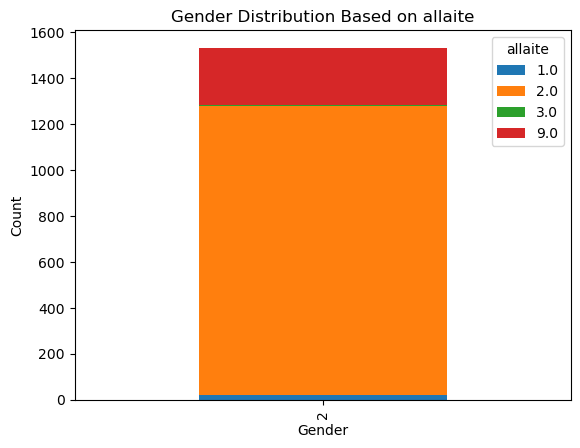

In [37]:
# Currently breastfeeding a child? : onsp response
define_attr(attr_name="allaite", plot=True)

***************** enceinte *****************
value counts for the attribute are  enceinte
2.0    1446
9.0      55
1.0      28
3.0       3
Name: count, dtype: int64
------------------------------------------------------
Total null values  1092
------------------------------------------------------
null values for females  5
-------------------------------------------------------
null values for males  1087
-------------------------------------------------------
summary of attribute  count    1532.000000
mean        2.234987
std         1.313499
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         9.000000
Name: enceinte, dtype: float64


<Figure size 800x600 with 0 Axes>

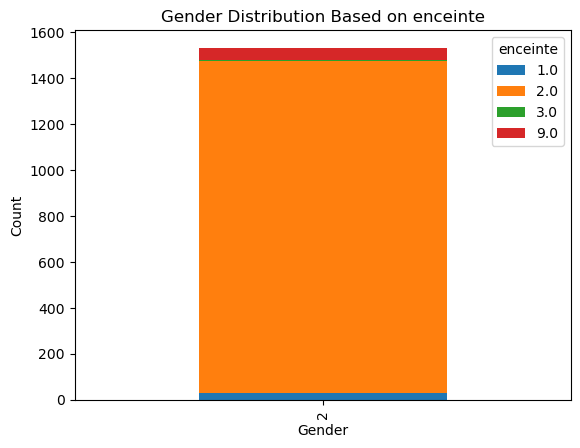

In [38]:
# Is she currently pregnant? : onsp
define_attr("enceinte", plot=True)

***************** enceinte12 *****************
value counts for the attribute are  enceinte12
2.0    1349
9.0      92
1.0      90
3.0       1
Name: count, dtype: int64
------------------------------------------------------
Total null values  1092
------------------------------------------------------
null values for females  5
-------------------------------------------------------
null values for males  1087
-------------------------------------------------------
summary of attribute  count    1532.000000
mean        2.362272
std         1.694872
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         9.000000
Name: enceinte12, dtype: float64


<Figure size 800x600 with 0 Axes>

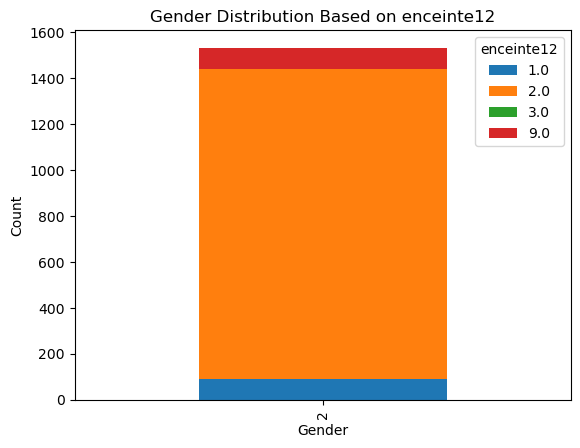

In [39]:
# was pragent in last 12 months : onsp
define_attr("enceinte12", plot=True)

In [40]:
# TOTAL physical activity weekly. (in minutes)
define_attr(attr_name="aptotal_hebdo")

***************** aptotal_hebdo *****************
value counts for the attribute are  aptotal_hebdo
0.0       126
1260.0     98
840.0      78
420.0      74
120.0      60
         ... 
1911.0      1
1545.0      1
1281.0      1
1425.0      1
2670.0      1
Name: count, Length: 304, dtype: int64
------------------------------------------------------
Total null values  28
------------------------------------------------------
null values for females  18
-------------------------------------------------------
null values for males  10
-------------------------------------------------------
summary of attribute  count    2596.000000
mean      859.968028
std       745.062059
min         0.000000
25%       260.000000
50%       640.000000
75%      1260.000000
max      3780.000000
Name: aptotal_hebdo, dtype: float64


In [41]:
# define_attr(attr_name="aptotal_hebdo", df=df_child)

In [42]:
# TOTAL physical activity intensity (in MET)
define_attr(attr_name="aptotal_met")

***************** aptotal_met *****************
value counts for the attribute are  aptotal_met
0.0       126
4158.0     55
1386.0     40
693.0      36
2772.0     32
         ... 
1639.5      1
6012.0      1
2310.0      1
4095.0      1
6972.0      1
Name: count, Length: 1098, dtype: int64
------------------------------------------------------
Total null values  28
------------------------------------------------------
null values for females  18
-------------------------------------------------------
null values for males  10
-------------------------------------------------------
summary of attribute  count     2596.000000
mean      3771.604276
std       3580.302945
min          0.000000
25%       1065.875000
50%       2772.000000
75%       5341.500000
max      19278.000000
Name: aptotal_met, dtype: float64


In [43]:
# Time spent sitting/day (in mins)
define_attr(attr_name="assis_j")

***************** assis_j *****************
value counts for the attribute are  assis_j
240.0    322
180.0    308
300.0    306
360.0    246
120.0    202
        ... 
4.0        1
280.0      1
363.0      1
520.0      1
190.0      1
Name: count, Length: 84, dtype: int64
------------------------------------------------------
Total null values  29
------------------------------------------------------
null values for females  20
-------------------------------------------------------
null values for males  9
-------------------------------------------------------
summary of attribute  count    2595.000000
mean      315.189595
std       176.278899
min         1.000000
25%       180.000000
50%       300.000000
75%       420.000000
max      1080.000000
Name: assis_j, dtype: float64


***************** autreg_cod *****************
value counts for the attribute are  autreg_cod
0.0    6
4.0    3
9.0    1
1.0    1
Name: count, dtype: int64
------------------------------------------------------
Total null values  1444
------------------------------------------------------


null values for females  761
-------------------------------------------------------
null values for males  683
-------------------------------------------------------
summary of attribute  count    11.000000
mean      2.000000
std       2.932576
min       0.000000
25%       0.000000
50%       0.000000
75%       4.000000
max       9.000000
Name: autreg_cod, dtype: float64


<Figure size 800x600 with 0 Axes>

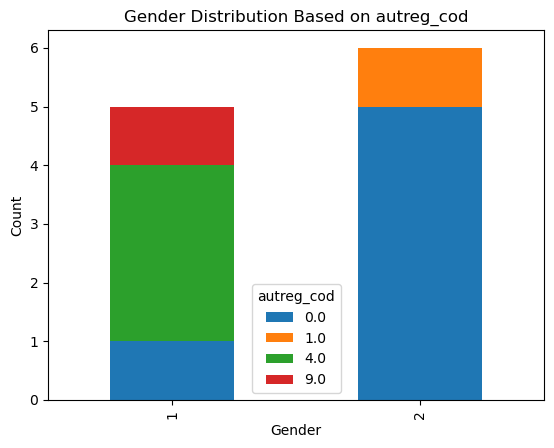

In [44]:
# otherg : Another reason to diet 
define_attr(attr_name="autreg_cod", plot=True, df=df_child)

***************** autregmedic_cod *****************
value counts for the attribute are  autregmedic_cod
4.0     12
0.0      6
5.0      4
10.0     1
1.0      1
11.0     1
Name: count, dtype: int64
------------------------------------------------------
Total null values  1430
------------------------------------------------------
null values for females  756
-------------------------------------------------------
null values for males  674
-------------------------------------------------------
summary of attribute  count    25.000000
mean      3.600000
std       2.813657
min       0.000000
25%       1.000000
50%       4.000000
75%       4.000000
max      11.000000
Name: autregmedic_cod, dtype: float64


<Figure size 800x600 with 0 Axes>

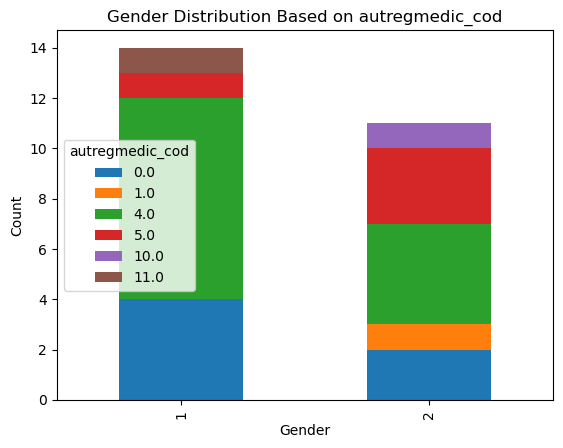

***************** autregmedic_cod *****************


<Figure size 800x600 with 0 Axes>

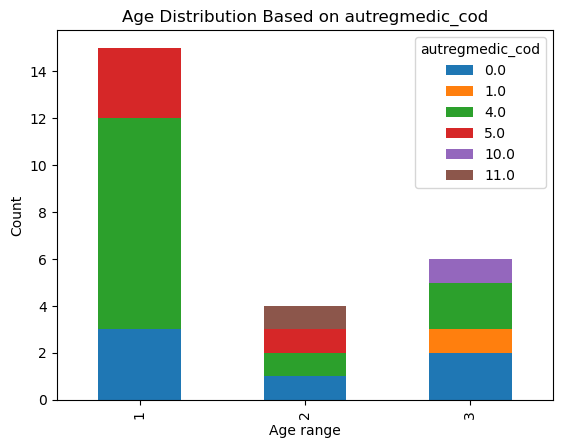

In [74]:
# What medical reason (other than weight)? - autregme
define_attr(attr_name="autregmedic_cod", plot=True, df=df_child)
plot_by_age(attr_name="autregmedic_cod",df=df_child)

***************** autregmedic_cod *****************
value counts for the attribute are  autregmedic_cod
1.0     74
2.0     44
3.0     32
5.0     16
8.0     11
0.0     11
4.0     10
7.0      9
6.0      9
9.0      4
12.0     3
10.0     2
18.0     2
19.0     2
16.0     2
15.0     2
17.0     2
14.0     1
13.0     1
11.0     1
Name: count, dtype: int64
------------------------------------------------------
Total null values  2386
------------------------------------------------------
null values for females  1383
-------------------------------------------------------
null values for males  1003
-------------------------------------------------------
summary of attribute  count    238.000000
mean       3.710084
std        3.920624
min        0.000000
25%        1.000000
50%        2.000000
75%        5.000000
max       19.000000
Name: autregmedic_cod, dtype: float64


<Figure size 800x600 with 0 Axes>

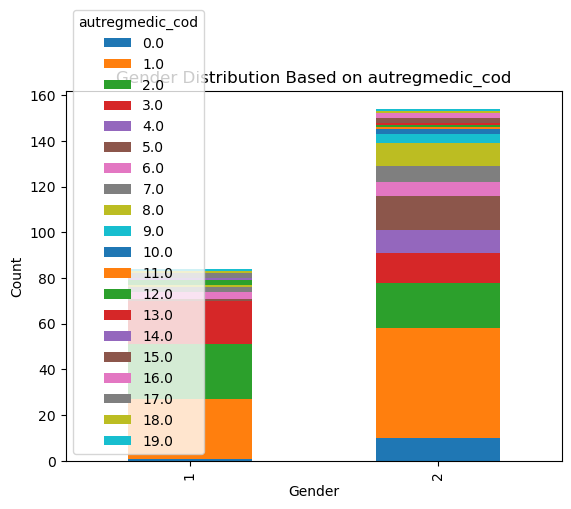

***************** autregmedic_cod *****************


<Figure size 800x600 with 0 Axes>

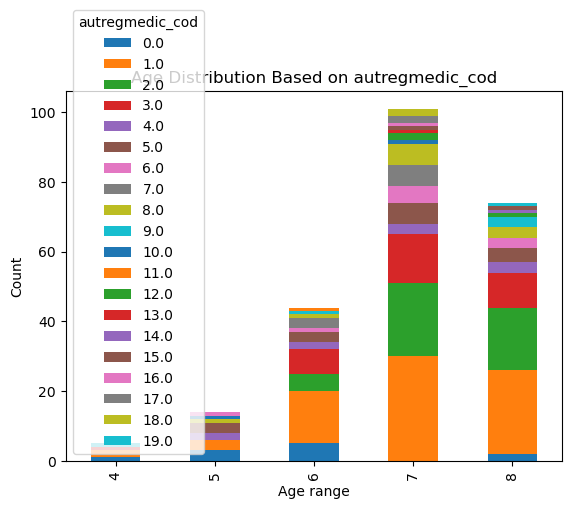

In [75]:
define_attr(attr_name="autregmedic_cod", plot=True)
plot_by_age(attr_name="autregmedic_cod")

### Nutrients Goals

In [46]:
# Body mass index
define_attr("bmi", df=df_child )

***************** bmi *****************
value counts for the attribute are  bmi
16.00000    8
16.32653    8
17.36111    7
18.75000    6
15.49587    6
           ..
21.35991    1
18.06781    1
17.63265    1
23.64444    1
22.58783    1
Name: count, Length: 1005, dtype: int64
------------------------------------------------------
Total null values  7
------------------------------------------------------
null values for females  5
-------------------------------------------------------
null values for males  2
-------------------------------------------------------
summary of attribute  count    1448.000000
mean       18.634720
std         3.719684
min         9.765625
25%        15.912210
50%        18.120115
75%        20.761250
max        41.322320
Name: bmi, dtype: float64


***************** bonalim *****************
value counts for the attribute are  bonalim
1.0    463
3.0    263
2.0    141
9.0     12
Name: count, dtype: int64
------------------------------------------------------
Total null values  576
------------------------------------------------------
null values for females  296
-------------------------------------------------------
null values for males  280
-------------------------------------------------------
summary of attribute  count    879.000000
mean       1.868032
std        1.216202
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max        9.000000
Name: bonalim, dtype: float64


<Figure size 800x600 with 0 Axes>

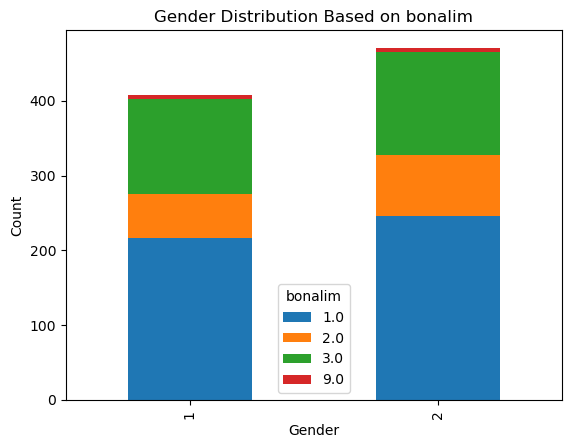

In [47]:
# Thinks they have a good diet for their health :onsp
define_attr("bonalim", plot=True , df=df_child )

***************** contalim *****************
value counts for the attribute are  contalim
1.0    251
2.0     63
Name: count, dtype: int64
------------------------------------------------------
Total null values  1141
------------------------------------------------------
null values for females  548
-------------------------------------------------------
null values for males  593
-------------------------------------------------------
summary of attribute  count    314.000000
mean       1.200637
std        0.401116
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: contalim, dtype: float64


<Figure size 800x600 with 0 Axes>

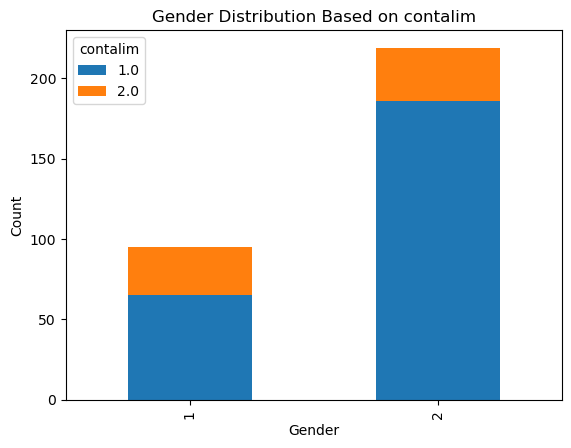

In [48]:
# Control your weight by changing your diet : onsp
define_attr("contalim", plot=True, df=df_child)

***************** contap *****************
value counts for the attribute are  contap
2.0    724
1.0    661
Name: count, dtype: int64
------------------------------------------------------
Total null values  1239
------------------------------------------------------
null values for females  595
-------------------------------------------------------


null values for males  644
-------------------------------------------------------
summary of attribute  count    1385.000000
mean        1.522744
std         0.499663
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: contap, dtype: float64


<Figure size 800x600 with 0 Axes>

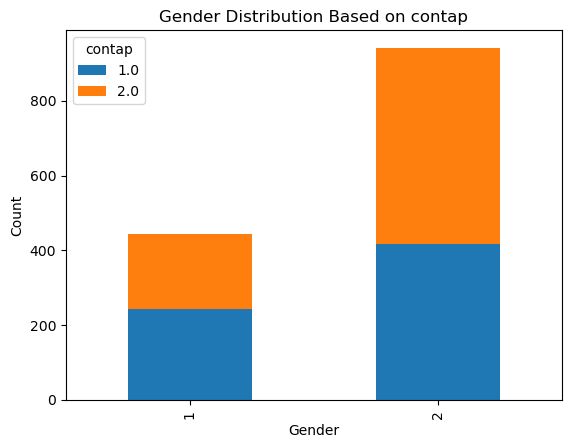

In [49]:
# Control your weight by increasing your physical activity
define_attr("contap", plot=True)

***************** contmed *****************
value counts for the attribute are  contmed
2.0    1299
1.0      86
Name: count, dtype: int64
------------------------------------------------------
Total null values  1239
------------------------------------------------------
null values for females  595
-------------------------------------------------------
null values for males  644
-------------------------------------------------------
summary of attribute  count    1385.000000
mean        1.937906
std         0.241413
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: contmed, dtype: float64


<Figure size 800x600 with 0 Axes>

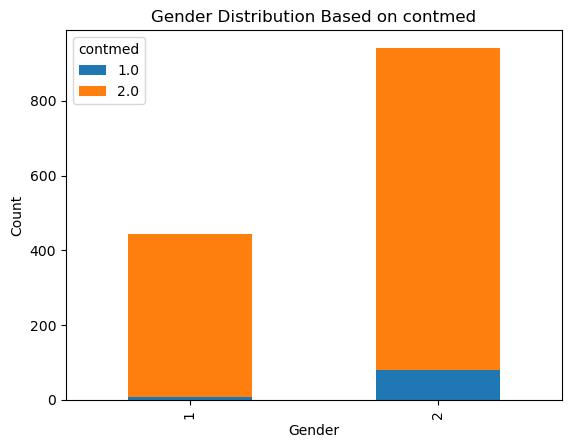

In [50]:
# Control your weight with medications, supplements. power supply
define_attr("contmed", plot=True)

In [51]:
# Control your weight by taking meal replacements
define_attr("contsubt")

***************** contsubt *****************
value counts for the attribute are  contsubt
2.0    1304
1.0      81
Name: count, dtype: int64
------------------------------------------------------
Total null values  1239
------------------------------------------------------
null values for females  595
-------------------------------------------------------
null values for males  644
-------------------------------------------------------
summary of attribute  count    1385.000000
mean        1.941516
std         0.234741
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: contsubt, dtype: float64


#### Consumption habbits

In [52]:
# Consumption. preference for fortified foods (vitamins, 
# minerals, other nouns.)
define_attr("enrich", df=df_child)

***************** enrich *****************
value counts for the attribute are  enrich
3.0    860
5.0    193
2.0    152
1.0    136
4.0     79
9.0     32
Name: count, dtype: int64
------------------------------------------------------
Total null values  3
------------------------------------------------------
null values for females  1
-------------------------------------------------------
null values for males  2
-------------------------------------------------------
summary of attribute  count    1452.000000
mean        3.160468
std         1.354374
min         1.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         9.000000
Name: enrich, dtype: float64


In [53]:
# Consumption frequency. average between the 3 main meals
define_attr("entrerep")

***************** entrerep *****************
value counts for the attribute are  entrerep
3.0    753
6.0    651
4.0    446
2.0    394
5.0    212
1.0     58
7.0     55
9.0     46
Name: count, dtype: int64
------------------------------------------------------
Total null values  9
------------------------------------------------------
null values for females  5
-------------------------------------------------------
null values for males  4
-------------------------------------------------------
summary of attribute  count    2615.000000
mean        4.074187
std         1.670850
min         1.000000
25%         3.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: entrerep, dtype: float64


***************** fqcigtm *****************
value counts for the attribute are  fqcigtm
3.0    205
4.0    157
2.0    150
5.0    143
6.0     67
1.0     47
Name: count, dtype: int64
------------------------------------------------------
Total null values  1855
------------------------------------------------------
null values for females  1105
-------------------------------------------------------
null values for males  750
-------------------------------------------------------
summary of attribute  count    769.000000
mean       3.520156
std        1.379697
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        6.000000
Name: fqcigtm, dtype: float64


<Figure size 800x600 with 0 Axes>

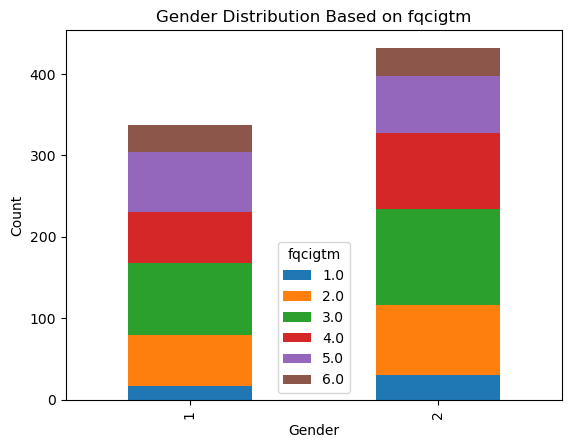

In [54]:
# Consumption frequency. cigarettes (sliced, current  smoker)
define_attr("fqcigtm",plot=True)

In [55]:
# Frequency of consumption of bread, cereals, PDT, vegetables. 
define_attr("fqfec")

***************** fqfec *****************
value counts for the attribute are  fqfec
5.0     1081
6.0      563
7.0      390
9.0      185
3.0      126
2.0       95
8.0       70
99.0      62
4.0       41
1.0        2
Name: count, dtype: int64
------------------------------------------------------
Total null values  9
------------------------------------------------------
null values for females  5
-------------------------------------------------------
null values for males  4
-------------------------------------------------------
summary of attribute  count    2615.000000
mean        7.881453
std        14.282981
min         1.000000
25%         5.000000
50%         5.000000
75%         7.000000
max        99.000000
Name: fqfec, dtype: float64


In [56]:
define_attr("fqfl")

***************** fqfl *****************
value counts for the attribute are  fqfl
6.0     653
7.0     542
5.0     489
9.0     430
10.0    171
8.0     132
11.0     91
99.0     56
3.0      25
4.0      14
2.0      10
1.0       2
Name: count, dtype: int64
------------------------------------------------------
Total null values  9
------------------------------------------------------
null values for females  5
-------------------------------------------------------
null values for males  4
-------------------------------------------------------
summary of attribute  count    2615.000000
mean        8.983174
std        13.437538
min         1.000000
25%         6.000000
50%         7.000000
75%         9.000000
max        99.000000
Name: fqfl, dtype: float64


In [57]:
# Interest in making your own food
define_attr("intalicuisi", df=df_child)

***************** intalicuisi *****************
value counts for the attribute are  intalicuisi
1.0    423
2.0    249
3.0     42
9.0     37
Name: count, dtype: int64
------------------------------------------------------
Total null values  704
------------------------------------------------------
null values for females  353
-------------------------------------------------------
null values for males  351
-------------------------------------------------------
summary of attribute  count    751.000000
mean       1.837550
std        1.735197
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        9.000000
Name: intalicuisi, dtype: float64


***************** intaliform *****************
value counts for the attribute are  intaliform
1.0    504
2.0    182
3.0     42
9.0     23
Name: count, dtype: int64
------------------------------------------------------
Total null values  704
------------------------------------------------------
null values for females  353
-------------------------------------------------------
null values for males  351
-------------------------------------------------------


summary of attribute  count    751.000000
mean       1.599201
std        1.438684
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        9.000000
Name: intaliform, dtype: float64


<Figure size 800x600 with 0 Axes>

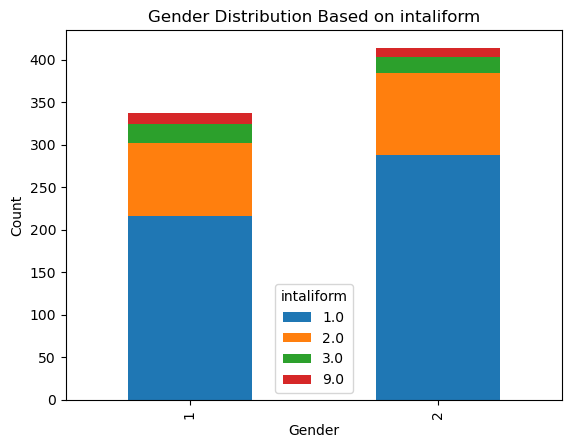

In [58]:
# Interest in knowing what to eat to be in shape
define_attr("intaliform", plot=True, df=df_child)

In [59]:
# Interest in knowing diets to lose weight or not gain weight
define_attr("intaliregi", df=df_child)

***************** intaliregi *****************
value counts for the attribute are  intaliregi
2.0    431
1.0    235
9.0     46
3.0     39
Name: count, dtype: int64
------------------------------------------------------
Total null values  704
------------------------------------------------------


null values for females  353
-------------------------------------------------------
null values for males  351
-------------------------------------------------------
summary of attribute  count    751.000000
mean       2.167776
std        1.828245
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        9.000000
Name: intaliregi, dtype: float64


***************** menopaus *****************
value counts for the attribute are  menopaus
2.0    826
1.0    520
9.0    173
3.0     13
Name: count, dtype: int64
------------------------------------------------------
Total null values  1092
------------------------------------------------------
null values for females  5
-------------------------------------------------------
null values for males  1087
-------------------------------------------------------
summary of attribute  count    1532.000000
mean        2.459530
std         2.381961
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         9.000000
Name: menopaus, dtype: float64


<Figure size 800x600 with 0 Axes>

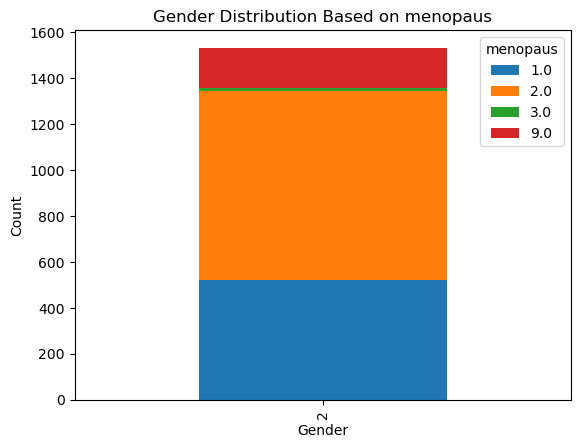

In [60]:
# is your menstrual cycle stops :onsp
define_attr("menopaus", plot=True)

***************** moisgross *****************
value counts for the attribute are  moisgross
3.0     5
8.0     5
4.0     4
6.0     4
7.0     3
2.0     2
1.0     2
5.0     1
99.0    1
98.0    1
Name: count, dtype: int64
------------------------------------------------------
Total null values  2596
------------------------------------------------------
null values for females  1509
-------------------------------------------------------
null values for males  1087
-------------------------------------------------------
summary of attribute  count    28.000000
mean     11.571429
std      24.653793
min       1.000000
25%       3.000000
50%       5.500000
75%       7.250000
max      99.000000
Name: moisgross, dtype: float64


<Figure size 800x600 with 0 Axes>

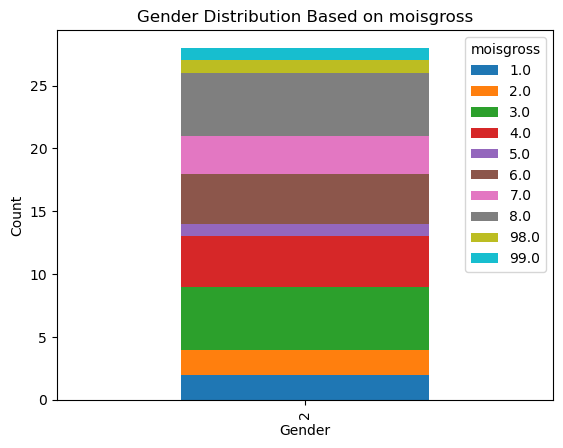

In [61]:
# month of pregancy 
define_attr("moisgross", plot=True)

In [62]:
# weight
define_attr("poidsm")

***************** poidsm *****************
value counts for the attribute are  poidsm
70.0    74
65.0    71
60.0    64
80.0    63
56.0    61
        ..
78.4     1
63.1     1
83.9     1
40.3     1
48.3     1
Name: count, Length: 269, dtype: int64
------------------------------------------------------
Total null values  255
------------------------------------------------------
null values for females  169
-------------------------------------------------------
null values for males  86
-------------------------------------------------------
summary of attribute  count    2369.000000
mean       69.956775
std        15.148376
min        35.000000
25%        59.000000
50%        68.000000
75%        79.000000
max       171.000000
Name: poidsm, dtype: float64


In [63]:
# diet to stay in shape
define_attr("regform", )

***************** regform *****************
value counts for the attribute are  regform
2.0    582
1.0    229
Name: count, dtype: int64
------------------------------------------------------
Total null values  1813
------------------------------------------------------
null values for females  960
-------------------------------------------------------
null values for males  853
-------------------------------------------------------
summary of attribute  count    811.000000
mean       1.717633
std        0.450429
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        2.000000
Name: regform, dtype: float64


***************** regimedj *****************
value counts for the attribute are  regimedj
2.0    1725
1.0     847
9.0      25
3.0      18
Name: count, dtype: int64
------------------------------------------------------
Total null values  9
------------------------------------------------------
null values for females  5
-------------------------------------------------------
null values for males  4
-------------------------------------------------------
summary of attribute  count    2615.000000
mean        1.749904
std         0.858469
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         9.000000
Name: regimedj, dtype: float64


<Figure size 800x600 with 0 Axes>

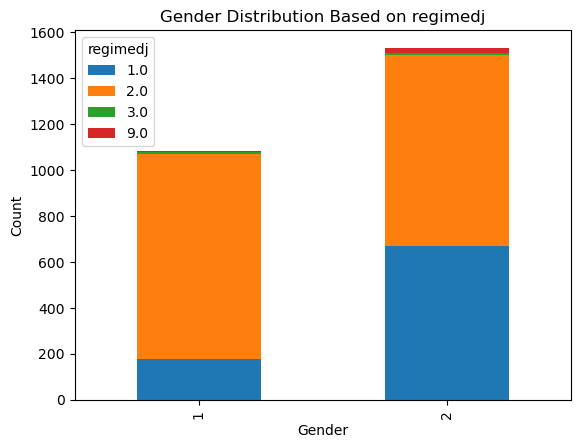

In [64]:
# Ever dieted to lose weight
define_attr("regimedj", plot=True)

In [65]:
# currently on Dieting
define_attr("regimem", df=df_child)

***************** regimem *****************
value counts for the attribute are  regimem
2.0    1279
1.0     173
Name: count, dtype: int64
------------------------------------------------------
Total null values  3
------------------------------------------------------
null values for females  1
-------------------------------------------------------
null values for males  2
-------------------------------------------------------
summary of attribute  count    1452.000000
mean        1.880854
std         0.324072
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: regimem, dtype: float64


In [66]:
define_attr("regmedic")

***************** regmedic *****************
value counts for the attribute are  regmedic
2.0    519
1.0    292
Name: count, dtype: int64
------------------------------------------------------
Total null values  1813
------------------------------------------------------
null values for females  960
-------------------------------------------------------
null values for males  853
-------------------------------------------------------
summary of attribute  count    811.000000
mean       1.639951
std        0.480311
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        2.000000
Name: regmedic, dtype: float64


In [67]:
define_attr(attr_name='poidsd')
# weight declared

***************** poidsd *****************
value counts for the attribute are  poidsd
65.0     14
80.0     13
70.0     13
75.0      9
55.0      9
         ..
104.0     1
93.0      1
117.0     1
51.8      1
94.0      1
Name: count, Length: 64, dtype: int64
------------------------------------------------------
Total null values  2397
------------------------------------------------------
null values for females  1393
-------------------------------------------------------
null values for males  1004
-------------------------------------------------------
summary of attribute  count    227.000000
mean      69.933480
std       14.196588
min       42.000000
25%       60.000000
50%       69.000000
75%       79.000000
max      130.000000
Name: poidsd, dtype: float64


In [68]:
define_attr(attr_name='poidsm', df=df_child)
# weight measured

***************** poidsm *****************
value counts for the attribute are  poidsm
50.0    34
52.0    33
16.0    33
20.0    29
45.0    28
        ..
99.8     1
40.4     1
27.7     1
58.9     1
38.6     1
Name: count, Length: 235, dtype: int64
------------------------------------------------------
Total null values  72
------------------------------------------------------
null values for females  36
-------------------------------------------------------
null values for males  36
-------------------------------------------------------
summary of attribute  count    1383.000000
mean       42.369342
std        18.406254
min        10.000000
25%        27.000000
50%        42.000000
75%        55.000000
max       128.000000
Name: poidsm, dtype: float64


In [69]:
# plot_by_age(attr_name='poidsm', df=df_child)
# weight declared

In [70]:
# plot_by_age(attr_name='poidsm')

In [71]:
define_attr("agefumem", df=df_child)
# agefumem:At what age did you start smoking regularly (current 
# smoker)
# agefumemnsp: look at this field

***************** agefumem *****************
value counts for the attribute are  agefumem
14.0    14
15.0    13
16.0     8
13.0     7
11.0     3
99.0     3
12.0     1
Name: count, dtype: int64
------------------------------------------------------
Total null values  1406
------------------------------------------------------
null values for females  739
-------------------------------------------------------
null values for males  667
-------------------------------------------------------
summary of attribute  count    49.000000
mean     19.428571
std      20.572028
min      11.000000
25%      14.000000
50%      14.000000
75%      15.000000
max      99.000000
Name: agefumem, dtype: float64


***************** intalicuisi *****************
value counts for the attribute are  intalicuisi
1.0    423
2.0    249
3.0     42
9.0     37
Name: count, dtype: int64
------------------------------------------------------
Total null values  704
------------------------------------------------------
null values for females  353
-------------------------------------------------------
null values for males  351
-------------------------------------------------------
summary of attribute  count    751.000000
mean       1.837550
std        1.735197
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        9.000000
Name: intalicuisi, dtype: float64
***************** intalicuisi *****************


<Figure size 800x600 with 0 Axes>

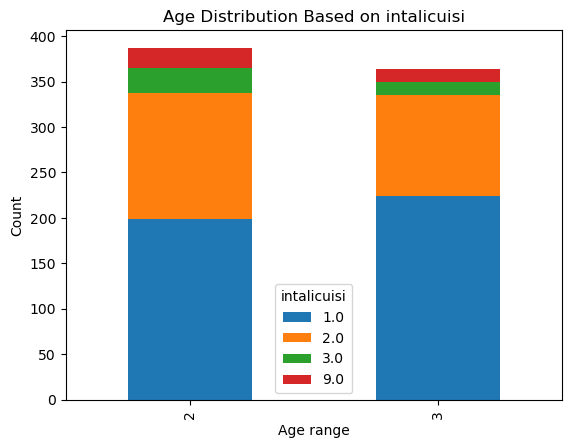

In [72]:
define_attr("intalicuisi", df=df_child)
plot_by_age("intalicuisi", df=df_child)

***************** intaliregi *****************
value counts for the attribute are  intaliregi
2.0    431
1.0    235
9.0     46
3.0     39
Name: count, dtype: int64
------------------------------------------------------
Total null values  704
------------------------------------------------------
null values for females  353
-------------------------------------------------------
null values for males  351
-------------------------------------------------------
summary of attribute  count    751.000000
mean       2.167776
std        1.828245
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        9.000000
Name: intaliregi, dtype: float64
***************** intaliregi *****************


<Figure size 800x600 with 0 Axes>

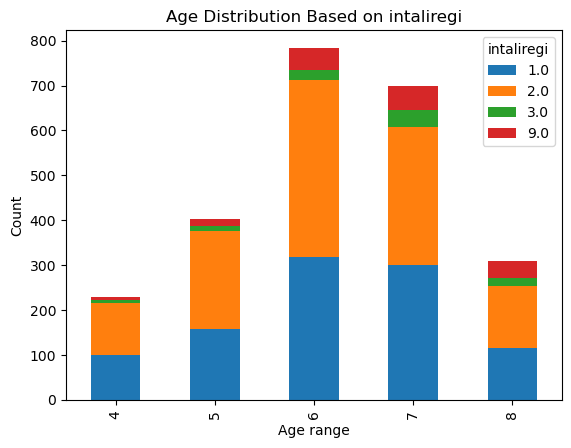

In [73]:
define_attr("intaliregi", df=df_child)
plot_by_age("intaliregi")

***************** autregmedic_cod *****************


<Figure size 800x600 with 0 Axes>

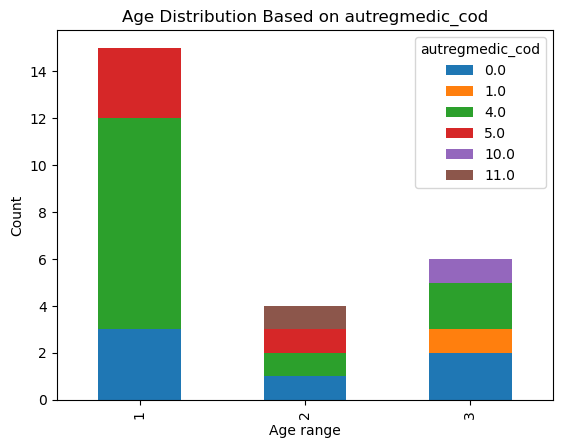

In [78]:
plot_by_age("autregmedic_cod", df=df_child)